In [ ]:
   # mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
# !unzip "/content/gdrive/MyDrive/diabetic_ratinography/resized_train.zip" -d "/content/gdrive/MyDrive/diabetic_ratinography/"

In [ ]:
# !pip install tensorflow-gpu==2.3.0

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os,cv2
from tensorflow.keras import applications
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential ,Model, load_model
from tensorflow.keras.layers import Dropout, Flatten, Dense ,Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau, TensorBoard
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from tqdm.notebook import tqdm_notebook
import time

In [ ]:
df1 = pd.read_csv("/content/gdrive/MyDrive/diabetic_ratinography/trainLabels.csv")
df1

,image,level
0,10_left,0
1,10_right,0
2,13_left,0
3,13_right,0
4,15_left,1
...,...,...
35121,44347_right,0
35122,44348_left,0
35123,44348_right,0
35124,44349_left,0


In [ ]:
directory = "/content/gdrive/MyDrive/diabetic_ratinography/resized_train/resized_train/"
classses = list(df1["level"])
image_name = list(df1["image"])

In [ ]:
np.unique(classses)

array([0, 1, 2, 3, 4])

In [ ]:
len_lable = len(np.unique(classses))
len_lable

5

In [ ]:
type(image_name)

list

In [ ]:
import os
import cv2
image_size=224
data1=[]#empty list


In [ ]:
# print(os.listdir(directory))

In [ ]:
dflabel = df1.loc[df1["image"]=="10007_right"]
dflabel["level"].values[0]

0

In [ ]:
import os
from os import listdir

imgs=os.listdir("/content/gdrive/MyDrive/diabetic_ratinography/resized_train/resized_train/resized_train/")[:12000]
imgs=[img for img in imgs if not "(" in img]

In [ ]:
dflabel = df1.loc[df1["image"]=='8845_left']
dflabel["level"].values[0]

0

In [ ]:
len(imgs)

8622

In [ ]:
df1

,image,level
0,10_left,0
1,10_right,0
2,13_left,0
3,13_right,0
4,15_left,1
...,...,...
35121,44347_right,0
35122,44348_left,0
35123,44348_right,0
35124,44349_left,0


In [ ]:
# df2 = pd.read_csv("/content/gdrive/MyDrive/diabetic_ratinography/trainLabels.csv")
# df2
for i in imgs:
  # break
  imgpath = "/content/gdrive/MyDrive/diabetic_ratinography/resized_train/resized_train/resized_train/"+i
  arr = cv2.imread(imgpath)#Reading Images
  arr = cv2.cvtColor(arr, cv2.COLOR_BGR2RGB)
  new_arr = cv2.resize(arr, (image_size, image_size))#Resizing into same shape
  imgName = i.split(".")[0]

  dflabels = df1.loc[df1["image"]==imgName]
  # print(imgName,dflabels.level.values)
  label = dflabels["level"].values[0]
  data1.append([new_arr, label])
  len(data1)

In [ ]:
import random
random.shuffle(data1)

In [ ]:
accuracy_list=[]

x=[]#ndependent
y=[]#dependent
for features,labels in data1:
    x.append(features)
    y.append(labels)

In [ ]:
# x

In [ ]:
# y

In [ ]:
x=np.array(x)
y=np.array(y)
#x=x/255 #feature scaling

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
np.unique(y_train)

array([0, 1, 2, 3, 4])

In [ ]:
X_test.shape

(1725, 224, 224, 3)

In [ ]:
import tensorflow as tf
base_model = applications.VGG16(weights='imagenet', include_top=False, input_shape=(224,224,3))
model = Sequential()
model.add(base_model)
model.add(Flatten(input_shape=base_model.output_shape[1:]))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(len_lable, activation='softmax'))
model = Model(inputs=model.input, outputs=model.output)
model.compile(loss='sparse_categorical_crossentropy',optimizer=optimizers.Adam(lr=1e-4),metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16_input (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 256)               6422784   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0     

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
progess = model.fit(x=X_train,y=y_train,epochs=10,validation_data= (X_test, y_test))

Epoch 1/10
216/216 [==============================] - 120s 484ms/step - loss: 0.9743 - accuracy: 0.7328 - val_loss: 0.8967 - val_accuracy: 0.7223
Epoch 2/10
216/216 [==============================] - 98s 454ms/step - loss: 0.8847 - accuracy: 0.7381 - val_loss: 0.8908 - val_accuracy: 0.7223
Epoch 3/10
216/216 [==============================] - 98s 454ms/step - loss: 0.8777 - accuracy: 0.7384 - val_loss: 0.8657 - val_accuracy: 0.7223
Epoch 4/10
216/216 [==============================] - 100s 465ms/step - loss: 0.8528 - accuracy: 0.7380 - val_loss: 0.8495 - val_accuracy: 0.7206
Epoch 5/10
216/216 [==============================] - 98s 454ms/step - loss: 0.8264 - accuracy: 0.7386 - val_loss: 0.8234 - val_accuracy: 0.7241
Epoch 6/10
216/216 [==============================] - 98s 454ms/step - loss: 0.7850 - accuracy: 0.7450 - val_loss: 0.8200 - val_accuracy: 0.7275
Epoch 7/10
216/216 [==============================] - 98s 454ms/step - loss: 0.7543 - accuracy: 0.7566 - val_loss: 0.7867 - val_

In [ ]:
model.save("diabetic_new_VGG16.hp5")

In [ ]:
!zip -r '/content/diabetic_new_VGG16.zip' '/content/diabetic_new_VGG16.hp5'

  adding: content/diabetic_new_VGG16.hp5/ (stored 0%)
  adding: content/diabetic_new_VGG16.hp5/assets/ (stored 0%)
  adding: content/diabetic_new_VGG16.hp5/variables/ (stored 0%)
  adding: content/diabetic_new_VGG16.hp5/variables/variables.index (deflated 74%)
  adding: content/diabetic_new_VGG16.hp5/variables/variables.data-00000-of-00001 (deflated 17%)
  adding: content/diabetic_new_VGG16.hp5/keras_metadata.pb (deflated 96%)
  adding: content/diabetic_new_VGG16.hp5/saved_model.pb (deflated 90%)


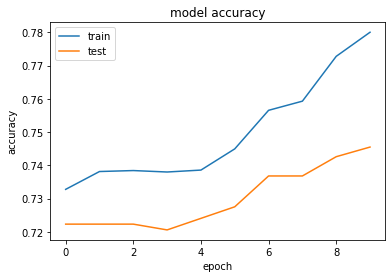

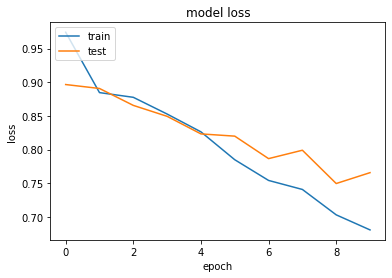

In [ ]:
plt.plot(progess.history['accuracy'])
plt.plot(progess.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(progess.history['loss'])
plt.plot(progess.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

54/54 [==============================] - 8s 144ms/step


In [ ]:
np.unique(y_test)

array([0, 1, 2, 3, 4])

In [ ]:
np.unique(y_pred)

array([0, 2, 3, 4])

In [ ]:
score=model.evaluate(X_test,y_test)
accuracy_list.append(score[1])

54/54 [==============================] - 8s 149ms/step - loss: 0.7658 - accuracy: 0.7455


[[1203    0   38    2    3]
 [ 132    0    4    0    0]
 [ 192    0   75    5    3]
 [  13    0   22    4    1]
 [   8    0   15    1    4]]


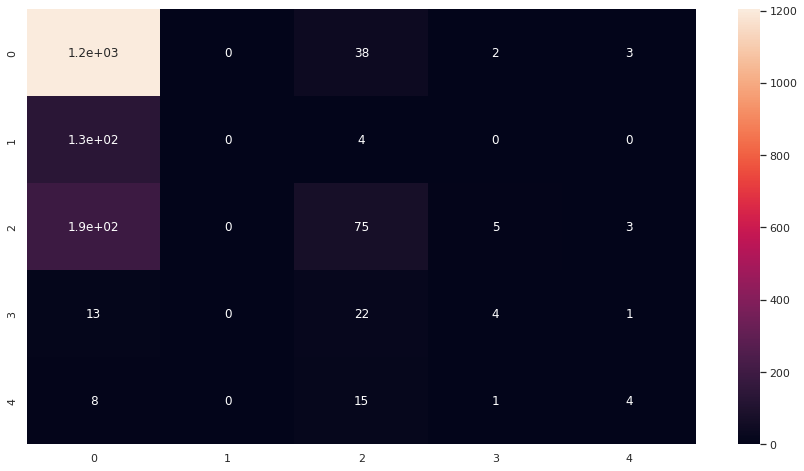

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)


sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(cf_matrix, annot=True)

In [ ]:
# Inception Model

In [ ]:
from tensorflow import keras
from tensorflow.keras import applications
from tensorflow.keras import layers
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau, TensorBoard
from sklearn.model_selection import train_test_split


base_model = applications.InceptionV3(weights='imagenet', include_top=False, input_shape=(224,224,3))
#X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
model_incep = Sequential()
data_augmentation = keras.Sequential([layers.experimental.preprocessing.RandomRotation(0.1)])
model_incep.add(base_model)
model_incep.add(Flatten(input_shape=base_model.output_shape[1:]))
model_incep.add(Dense(256, activation='relu'))
model_incep.add(Dropout(0.2))
model_incep.add(Dense(128, activation='relu'))
model_incep.add(Dropout(0.2))
model_incep.add(Dense(len_lable, activation='softmax'))

model_incep = Model(inputs=model_incep.input, outputs=model_incep.output)
model_incep.compile(loss='sparse_categorical_crossentropy', optimizer=optimizers.Adam(lr=1e-4),
              metrics=['accuracy'])


earlyStopping = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=3,
                              verbose=1)

#early_stop=[earlyStopping]


87910968/87910968 [==============================] - 5s 0us/step


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
progess_1 = model_incep.fit(x=X_train,y=y_train,epochs=10,validation_data= (X_test, y_test),batch_size=16)

Epoch 1/10
432/432 [==============================] - 76s 153ms/step - loss: 0.9184 - accuracy: 0.7173 - val_loss: 0.8524 - val_accuracy: 0.7136
Epoch 2/10
432/432 [==============================] - 62s 144ms/step - loss: 0.7750 - accuracy: 0.7425 - val_loss: 0.9603 - val_accuracy: 0.7310
Epoch 3/10
432/432 [==============================] - 62s 143ms/step - loss: 0.7212 - accuracy: 0.7551 - val_loss: 0.7990 - val_accuracy: 0.7281
Epoch 4/10
432/432 [==============================] - 62s 144ms/step - loss: 0.6603 - accuracy: 0.7783 - val_loss: 0.8063 - val_accuracy: 0.7304
Epoch 5/10
432/432 [==============================] - 63s 145ms/step - loss: 0.5615 - accuracy: 0.8050 - val_loss: 1.0580 - val_accuracy: 0.7432
Epoch 6/10
432/432 [==============================] - 63s 146ms/step - loss: 0.4739 - accuracy: 0.8338 - val_loss: 1.0024 - val_accuracy: 0.7397
Epoch 7/10
432/432 [==============================] - 62s 143ms/step - loss: 0.3896 - accuracy: 0.8567 - val_loss: 1.5749 - val_ac

In [ ]:
# for ik in range(5):
#     progess_1 = model_incep.fit(x=X_train,y=y_train,epochs=15,validation_data= (X_test, y_test),batch_size=16)

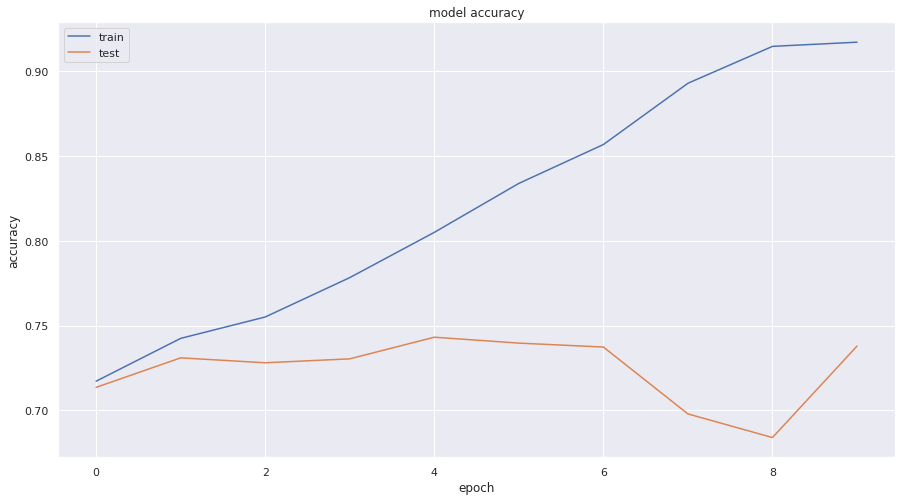

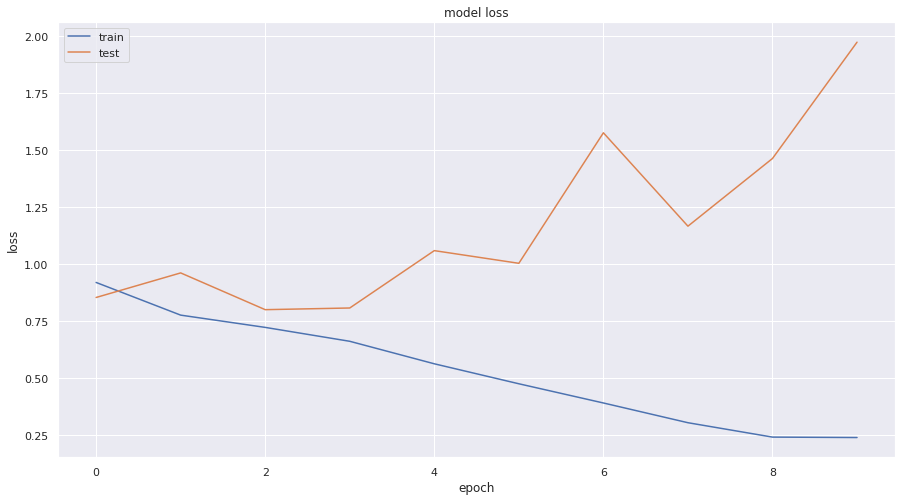

In [ ]:
plt.plot(progess_1.history['accuracy'])
plt.plot(progess_1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(progess_1.history['loss'])
plt.plot(progess_1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model_incep.save("new_incep.hp5")

In [ ]:
Y_pred = model_incep.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

54/54 [==============================] - 7s 86ms/step


In [ ]:
score=model_incep.evaluate(X_test,y_test)
accuracy_list.append(score[1])

54/54 [==============================] - 4s 72ms/step - loss: 1.9724 - accuracy: 0.7380


[[1192   25   29    0    0]
 [ 123    6    7    0    0]
 [ 200    6   64    4    1]
 [  16    1   18    4    1]
 [   6    1   14    0    7]]


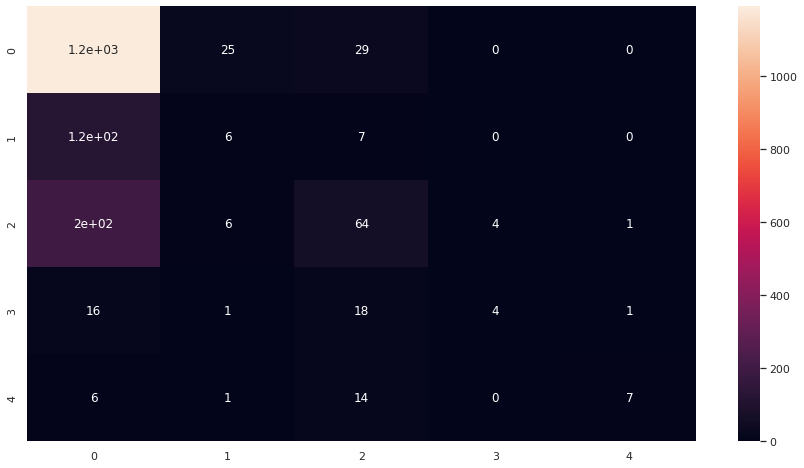

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

import seaborn as sns
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(cf_matrix, annot=True)

In [ ]:
accuracy_list

[0.7455072402954102, 0.7379710078239441]

In [ ]:
# ResNet50

In [ ]:
from tensorflow.keras import applications
from tensorflow.keras import layers
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau, TensorBoard
from sklearn.model_selection import train_test_split


base_model = applications.ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3))
#X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
model_res = Sequential()
#data_augmentation = keras.Sequential([layers.experimental.preprocessing.RandomRotation(0.1)])
model_res.add(base_model)
model_res.add(Flatten(input_shape=base_model.output_shape[1:]))
model_res.add(Dense(512, activation='relu'))
model_res.add(Dropout(0.5))
model_res.add(Dense(256, activation='relu'))
model_res.add(Dropout(0.5))
model_res.add(Dense(128, activation='relu'))
model_res.add(Dropout(0.5))
model_res.add(Dense(64, activation='relu'))
model_res.add(Dropout(0.5))
model_res.add(Dense(len_lable, activation='softmax'))

model_res = Model(inputs=model_res.input, outputs=model_res.output)
model_res.compile(loss='sparse_categorical_crossentropy', optimizer=optimizers.Adam(lr=1e-4),
              metrics=['accuracy'])


earlyStopping = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=3,
                              verbose=1)

#early_stop=[earlyStopping]


94765736/94765736 [==============================] - 5s 0us/step


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
progess_1 = model_res.fit(x=X_train,y=y_train,epochs=10,validation_data= (X_test, y_test),batch_size=32)

Epoch 1/10
216/216 [==============================] - 86s 360ms/step - loss: 1.9239 - accuracy: 0.5321 - val_loss: 1.0095 - val_accuracy: 0.7223
Epoch 2/10
216/216 [==============================] - 74s 344ms/step - loss: 1.1533 - accuracy: 0.6603 - val_loss: 0.8890 - val_accuracy: 0.7223
Epoch 3/10
216/216 [==============================] - 74s 344ms/step - loss: 1.0272 - accuracy: 0.7003 - val_loss: 0.8857 - val_accuracy: 0.7223
Epoch 4/10
216/216 [==============================] - 74s 343ms/step - loss: 0.9451 - accuracy: 0.7135 - val_loss: 1.4464 - val_accuracy: 0.7223
Epoch 5/10
216/216 [==============================] - 74s 344ms/step - loss: 0.8798 - accuracy: 0.7250 - val_loss: 0.8702 - val_accuracy: 0.7223
Epoch 6/10
216/216 [==============================] - 74s 343ms/step - loss: 0.8179 - accuracy: 0.7287 - val_loss: 0.8397 - val_accuracy: 0.7223
Epoch 7/10
216/216 [==============================] - 74s 343ms/step - loss: 0.7519 - accuracy: 0.7323 - val_loss: 1.0193 - val_ac

In [ ]:
# for ik in range(5):
#     progess_1 = model_res.fit(x=X_train,y=y_train,epochs=10,validation_data= (X_test, y_test),batch_size=8)

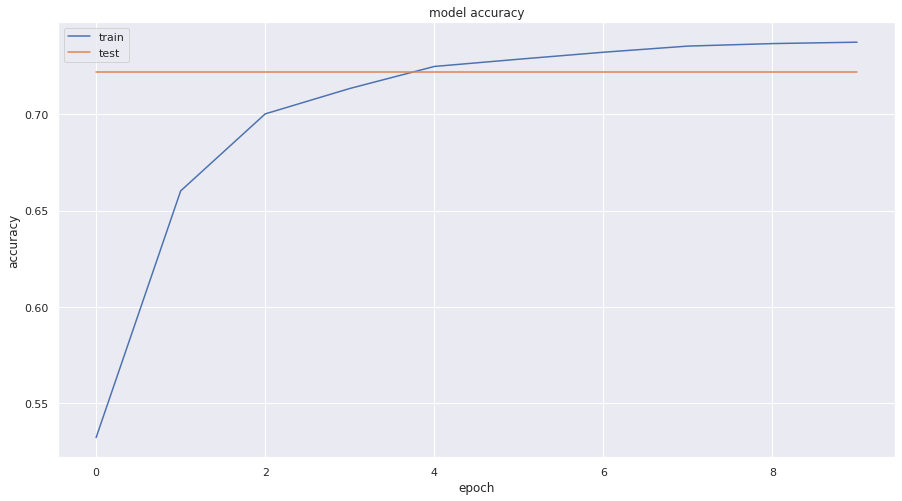

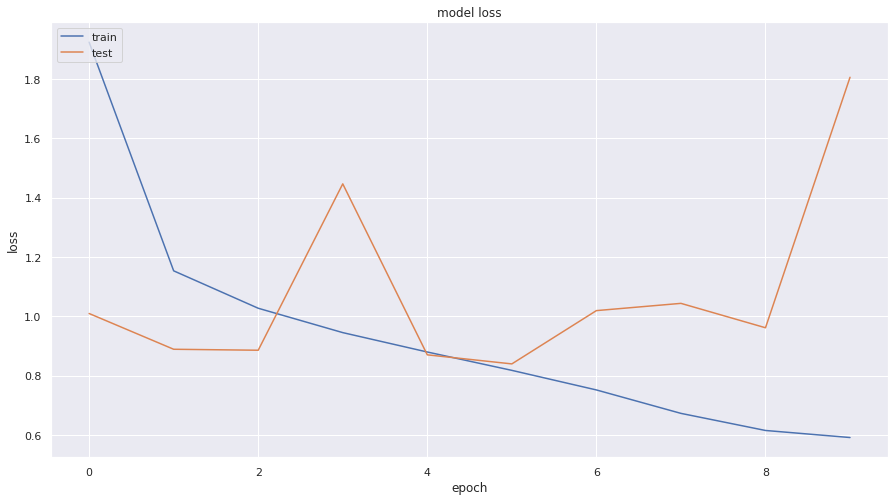

In [ ]:
plt.plot(progess_1.history['accuracy'])
plt.plot(progess_1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(progess_1.history['loss'])
plt.plot(progess_1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model_res.save("new_resnet.hp5")

In [ ]:
Y_pred = model_res.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)


54/54 [==============================] - 6s 88ms/step


[[1246    0    0    0    0]
 [ 136    0    0    0    0]
 [ 275    0    0    0    0]
 [  40    0    0    0    0]
 [  28    0    0    0    0]]


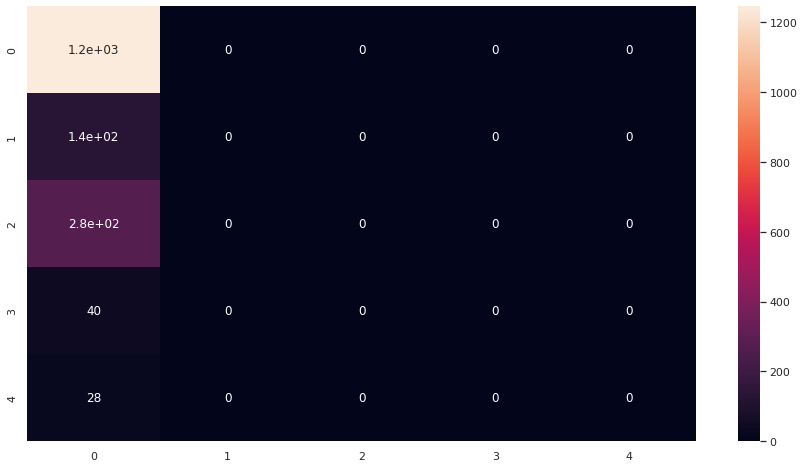

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

import seaborn as sns
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(cf_matrix, annot=True)

In [ ]:
# print(classification_report(y_test, y_pred, target_names=classses))

In [ ]:
score=model_res.evaluate(X_test,y_test)

54/54 [==============================] - 5s 93ms/step - loss: 1.8057 - accuracy: 0.7223


In [ ]:
accuracy_list1 = [0.7537500262260437, 0.6762499809265137]

In [ ]:
accuracy_list1.append(score[1])
accuracy_list1

[0.7537500262260437, 0.6762499809265137, 0.7223188281059265]

In [ ]:
accuracy_list1

[0.7537500262260437, 0.6762499809265137, 0.7223188281059265]

In [ ]:
raw_data = {"Algorithms":['VGG 16','InceptionV3','Resnet50'],
            "Accuracy_Score":accuracy_list1}

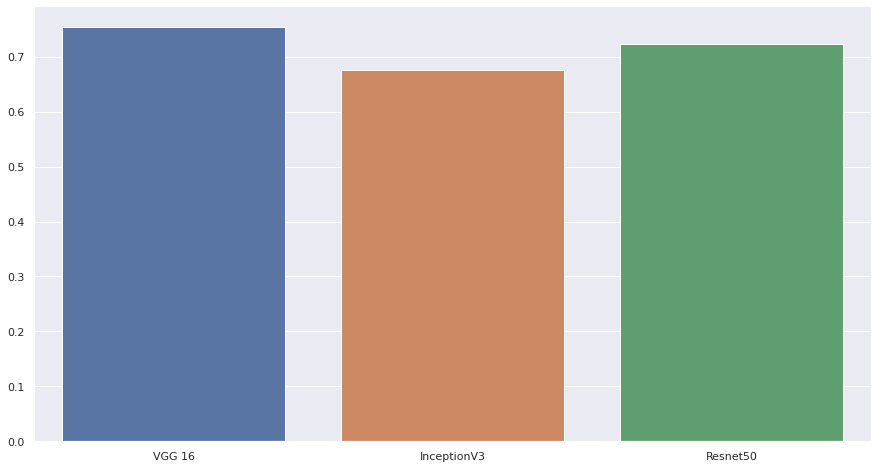

In [ ]:
import seaborn as sns


ax=sns.barplot(x="Algorithms", y="Accuracy_Score", data=raw_data)
# ax.bar_label(ax.containers[0])

In [ ]:
!zip -r '/content/new_incep.zip' '/content/new_incep.hp5'

  adding: content/new_incep.hp5/ (stored 0%)
  adding: content/new_incep.hp5/assets/ (stored 0%)
  adding: content/new_incep.hp5/variables/ (stored 0%)
  adding: content/new_incep.hp5/variables/variables.index (deflated 79%)
  adding: content/new_incep.hp5/variables/variables.data-00000-of-00001 (deflated 15%)
  adding: content/new_incep.hp5/keras_metadata.pb (deflated 96%)
  adding: content/new_incep.hp5/saved_model.pb (deflated 92%)


In [ ]:
!zip -r '/content/new_resnet.zip' '/content/new_resnet.hp5'

  adding: content/new_resnet.hp5/ (stored 0%)
  adding: content/new_resnet.hp5/assets/ (stored 0%)
  adding: content/new_resnet.hp5/variables/ (stored 0%)
  adding: content/new_resnet.hp5/variables/variables.index (deflated 80%)
  adding: content/new_resnet.hp5/variables/variables.data-00000-of-00001 (deflated 19%)
  adding: content/new_resnet.hp5/keras_metadata.pb (deflated 96%)
  adding: content/new_resnet.hp5/saved_model.pb (deflated 92%)


In [ ]:
# EfficientNetB7

In [ ]:
from tensorflow.keras import applications
from tensorflow.keras import layers
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau, TensorBoard
from sklearn.model_selection import train_test_split
#X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2)


base_model = applications.EfficientNetB7(weights='imagenet', include_top=False, input_shape=(224,224,3))

model_res = Sequential()
#data_augmentation = keras.Sequential([layers.experimental.preprocessing.RandomRotation(0.1)])
model_res.add(base_model)
model_res.add(Flatten(input_shape=base_model.output_shape[1:]))
model_res.add(Dense(512, activation='relu'))
model_res.add(Dense(256, activation='relu'))
model_res.add(Dense(128, activation='relu'))
model_res.add(Dense(64, activation='relu'))
model_res.add(Dense(len_lable, activation='softmax'))

model_res = Model(inputs=model_res.input, outputs=model_res.output)
model_res.compile(loss='sparse_categorical_crossentropy', optimizer=optimizers.Adam(lr=1e-4),
              metrics=['accuracy'])


earlyStopping = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=3,
                              verbose=1)


258076736/258076736 [==============================] - 13s 0us/step


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
progess_1 = model_res.fit(x=X_train,y=y_train,epochs=20,validation_data= (X_test, y_test),batch_size=2)

Epoch 1/20
 726/3449 [=====>........................] - ETA: 9:49 - loss: 1.0711 - accuracy: 0.6873